In [1]:
### Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [5]:
### Import initial empirical data
initialFinding = pd.read_csv('./results/compareLargeRangeUndirected.csv')
initialFinding

,dimension,edges,isDirectional,minWeight,maxWeight,algo,time
0,1,0,False,0,50,dHeapNList,0.006914
1,1,0,False,0,50,dNormal,0.001192
2,2,1,False,0,50,dHeapNList,0.026941
3,2,1,False,0,50,dNormal,0.016928
4,3,3,False,0,50,dHeapNList,0.056982
...,...,...,...,...,...,...,...
11919,57,1571,False,0,50,dNormal,679.099321
11920,58,1628,False,0,50,dHeapNList,11277.636051
11921,58,1628,False,0,50,dNormal,508.823156
11922,59,1678,False,0,50,dHeapNList,11877.349854


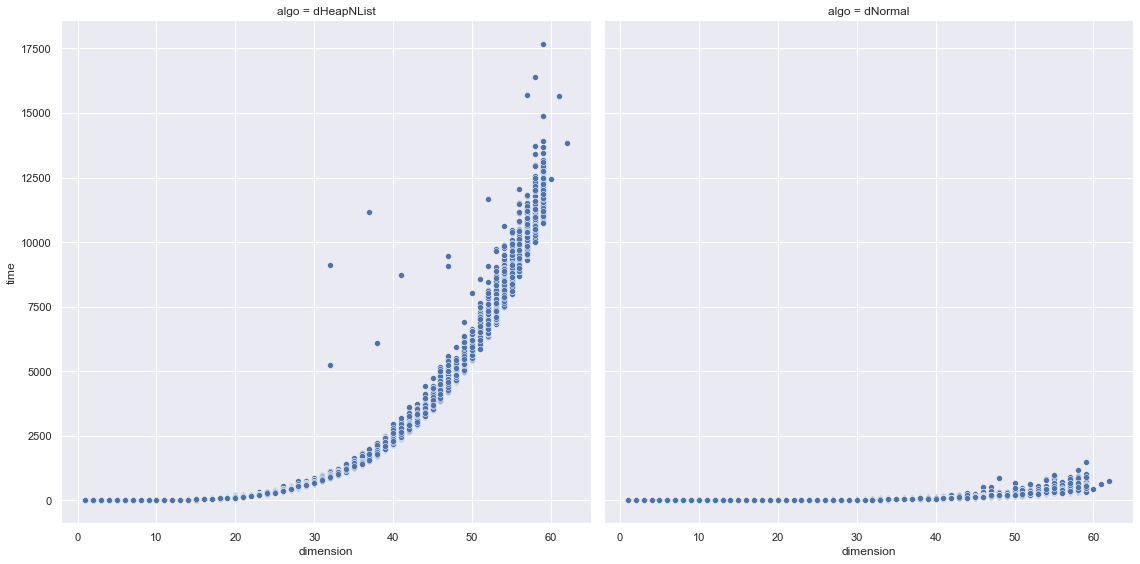

In [8]:
### Plot for initial data
initPlot = sns.FacetGrid(initialFinding, col='algo', height=8,col_wrap=2)
initPlot.map(sns.scatterplot, "dimension", "time")